In [88]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

In [89]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [90]:
df = pd.read_csv('heart1.csv')

In [91]:
data = df[~df.isin(['?'])]

In [92]:
data = data.dropna(axis=0)

In [93]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [94]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [95]:
X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])

In [96]:
X[0]

array([ 52.,   1.,   0., 125., 212.,   0.,   1., 168.,   0.,   1.,   2.,
         2.,   3.])

In [97]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [98]:
X[0]

array([-0.26843658,  0.66150409, -0.91575542, -0.37763552, -0.65933209,
       -0.41887792,  0.89125488,  0.82132052, -0.71228712, -0.06088839,
        0.99543334,  1.20922066,  1.08985168])

In [99]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [100]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(820, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [101]:
X_train[0]

array([ 0.834359  , -1.51170646, -0.91575542,  0.36487493,  0.93082177,
        2.38733039,  0.89125488, -1.87497657, -0.71228712,  0.70540823,
       -0.6241209 ,  2.17981673, -0.52212231])

In [131]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
from keras.layers import LSTM


# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
   
    # compile model
    #opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 16)                224       
                                                                 
 dropout_32 (Dropout)        (None, 16)                0         
                                                                 
 dense_49 (Dense)            (None, 8)                 136       
                                                                 
 dropout_33 (Dropout)        (None, 8)                 0         
                                                                 
 dense_50 (Dense)            (None, 2)                 18        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


In [118]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=200, batch_size=10)

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
56/82 [===================>..........] - ETA: 0s - loss: 0.6801 - accuracy: 0.5482 WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000269FF7FBD30> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, se

82/82 [==============================] - 0s 1ms/step - loss: 0.2820 - accuracy: 0.9049 - val_loss: 0.2620 - val_accuracy: 0.9073
Epoch 45/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2897 - accuracy: 0.8963 - val_loss: 0.2642 - val_accuracy: 0.9073
Epoch 46/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2927 - accuracy: 0.8963 - val_loss: 0.2585 - val_accuracy: 0.9171
Epoch 47/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2674 - accuracy: 0.9085 - val_loss: 0.2621 - val_accuracy: 0.9171
Epoch 48/200
82/82 [==============================] - 0s 1ms/step - loss: 0.3087 - accuracy: 0.8805 - val_loss: 0.2646 - val_accuracy: 0.9171
Epoch 49/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2889 - accuracy: 0.9037 - val_loss: 0.2599 - val_accuracy: 0.9122
Epoch 50/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2768 - accuracy: 0.9122 - val_loss: 0.2585 - val_accuracy: 0.9122
Epoch 51/200
82/82 

Epoch 102/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2323 - accuracy: 0.9256 - val_loss: 0.2138 - val_accuracy: 0.9463
Epoch 103/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2392 - accuracy: 0.9244 - val_loss: 0.2191 - val_accuracy: 0.9463
Epoch 104/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2557 - accuracy: 0.9207 - val_loss: 0.2158 - val_accuracy: 0.9415
Epoch 105/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2261 - accuracy: 0.9256 - val_loss: 0.2083 - val_accuracy: 0.9512
Epoch 106/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2311 - accuracy: 0.9183 - val_loss: 0.2071 - val_accuracy: 0.9512
Epoch 107/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2264 - accuracy: 0.9317 - val_loss: 0.2137 - val_accuracy: 0.9366
Epoch 108/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2449 - accuracy: 0.9195 - val_loss: 0.2013 - val_accuracy: 0.9561

82/82 [==============================] - 0s 1ms/step - loss: 0.2111 - accuracy: 0.9366 - val_loss: 0.2000 - val_accuracy: 0.9561
Epoch 160/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2217 - accuracy: 0.9207 - val_loss: 0.2010 - val_accuracy: 0.9561
Epoch 161/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2212 - accuracy: 0.9329 - val_loss: 0.1998 - val_accuracy: 0.9463
Epoch 162/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2110 - accuracy: 0.9439 - val_loss: 0.2007 - val_accuracy: 0.9463
Epoch 163/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2189 - accuracy: 0.9329 - val_loss: 0.1971 - val_accuracy: 0.9561
Epoch 164/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2138 - accuracy: 0.9354 - val_loss: 0.1978 - val_accuracy: 0.9561
Epoch 165/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2254 - accuracy: 0.9341 - val_loss: 0.1989 - val_accuracy: 0.9463
Epoch 166/200

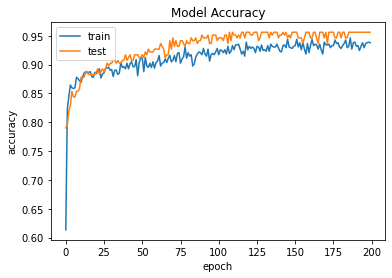

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

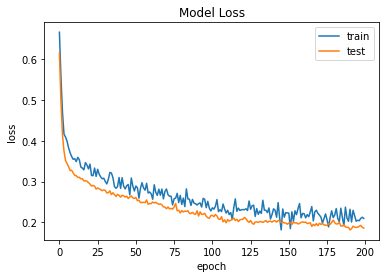

In [120]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [121]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0]


In [122]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    #adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 16)                224       
                                                                 
 dropout_24 (Dropout)        (None, 16)                0         
                                                                 
 dense_37 (Dense)            (None, 8)                 136       
                                                                 
 dropout_25 (Dropout)        (None, 8)                 0         
                                                                 
 dense_38 (Dense)            (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [123]:
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=200, batch_size=10)

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
62/82 [=====================>........] - ETA: 0s - loss: 0.6760 - accuracy: 0.6694 WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000269FE05D940> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, se

82/82 [==============================] - 0s 1ms/step - loss: 0.2965 - accuracy: 0.8927 - val_loss: 0.2767 - val_accuracy: 0.9073
Epoch 45/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2988 - accuracy: 0.8878 - val_loss: 0.2795 - val_accuracy: 0.8976
Epoch 46/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2918 - accuracy: 0.8951 - val_loss: 0.2758 - val_accuracy: 0.9024
Epoch 47/200
82/82 [==============================] - 0s 1ms/step - loss: 0.3133 - accuracy: 0.8915 - val_loss: 0.2732 - val_accuracy: 0.9073
Epoch 48/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2792 - accuracy: 0.9085 - val_loss: 0.2706 - val_accuracy: 0.9122
Epoch 49/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2965 - accuracy: 0.8963 - val_loss: 0.2677 - val_accuracy: 0.9366
Epoch 50/200
82/82 [==============================] - 0s 1ms/step - loss: 0.3049 - accuracy: 0.8927 - val_loss: 0.2631 - val_accuracy: 0.9366
Epoch 51/200
82/82 

Epoch 102/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2658 - accuracy: 0.9073 - val_loss: 0.2598 - val_accuracy: 0.9366
Epoch 103/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2679 - accuracy: 0.9122 - val_loss: 0.2596 - val_accuracy: 0.9366
Epoch 104/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2703 - accuracy: 0.9012 - val_loss: 0.2569 - val_accuracy: 0.9415
Epoch 105/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2638 - accuracy: 0.9098 - val_loss: 0.2584 - val_accuracy: 0.9268
Epoch 106/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2610 - accuracy: 0.9024 - val_loss: 0.2588 - val_accuracy: 0.9366
Epoch 107/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2776 - accuracy: 0.9049 - val_loss: 0.2585 - val_accuracy: 0.9366
Epoch 108/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2414 - accuracy: 0.9159 - val_loss: 0.2597 - val_accuracy: 0.9366

82/82 [==============================] - 0s 1ms/step - loss: 0.1935 - accuracy: 0.9354 - val_loss: 0.2399 - val_accuracy: 0.9317
Epoch 160/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2157 - accuracy: 0.9366 - val_loss: 0.2427 - val_accuracy: 0.9366
Epoch 161/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2495 - accuracy: 0.9098 - val_loss: 0.2407 - val_accuracy: 0.9317
Epoch 162/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2327 - accuracy: 0.9293 - val_loss: 0.2389 - val_accuracy: 0.9366
Epoch 163/200
82/82 [==============================] - 0s 1ms/step - loss: 0.1961 - accuracy: 0.9341 - val_loss: 0.2445 - val_accuracy: 0.9317
Epoch 164/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2414 - accuracy: 0.9195 - val_loss: 0.2408 - val_accuracy: 0.9317
Epoch 165/200
82/82 [==============================] - 0s 1ms/step - loss: 0.2296 - accuracy: 0.9305 - val_loss: 0.2418 - val_accuracy: 0.9366
Epoch 166/200

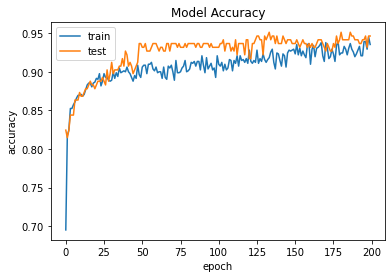

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

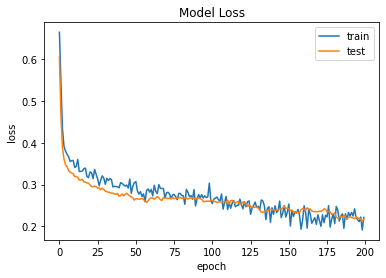

In [125]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [126]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Results for Categorical Model
0.9560975609756097
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       100
           1       0.96      0.95      0.96       105

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96    

In [127]:
# generate classification report using predictions for binary model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Results for Binary Model
0.9463414634146341
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       100
           1       0.95      0.94      0.95       105

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       20